# Getting familiar with *music21*

Audio to MIDI is [NOT](https://stackoverflow.com/questions/46394954/is-it-possible-to-analyze-mp3-file-using-music21) quite [possible](https://wiki.audacityteam.org/wiki/Midi#Converting_from_audio_formats_to_MIDI) right now. Such a shame :/. This limits our data A LOT. The `audioSearch` package from `music21` is not there yet... The only way it works is for single-voice monophonic audios (melodies with only one note at a time)... otherwise the combined frequencies messes up the whole thing. It may be possible using Deep Learing, but it would be a project on its own, and possibly out of scope. Audio source separation is considered to be a very difficult topic. TODO: find out more about this... and check out 6.3.1.2, 6.3.2.3, 6.9.3.2 and 7.2 for more, but I think it's out of scope. (sections are from the source provided on `README.md`). 

MIDI files, apart from being much more rare, are also missing the expresivness of the musician, and maybe something else. TODO: find out if there is some more data missing. 

We could also use some other types of files, as long as the way *music21* processes them is similar. For now let's try with MIDI.

## Creating Music

In [1]:
import music21 as ms

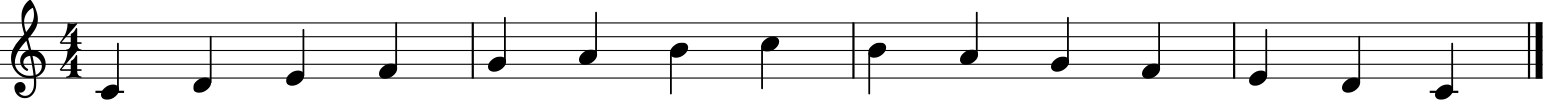

In [2]:
# Creats the C major scale 
stream = ms.stream.Stream()
scale = ["C", "D", "E", "F", "G", "A", "B"]
for note in scale + ["C5"] + scale[::-1]:
    stream.append(ms.note.Note(note))
# Shows on a score
stream.show()

*[music21](https://web.mit.edu/music21/doc/index.html)* uses the [scientific pith notation](https://en.wikipedia.org/wiki/Scientific_pitch_notation). The defaults are the fourth octave.

In [3]:
stream.show("text")

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{3.0} <music21.note.Note F>
{4.0} <music21.note.Note G>
{5.0} <music21.note.Note A>
{6.0} <music21.note.Note B>
{7.0} <music21.note.Note C>
{8.0} <music21.note.Note B>
{9.0} <music21.note.Note A>
{10.0} <music21.note.Note G>
{11.0} <music21.note.Note F>
{12.0} <music21.note.Note E>
{13.0} <music21.note.Note D>
{14.0} <music21.note.Note C>


In [4]:
stream[0]

<music21.note.Note C>

In [5]:
stream[0].nameWithOctave

'C'

In [6]:
stream[7].nameWithOctave

'C5'

In [7]:
stream[2].offset

2.0

In [8]:
stream.duration

<music21.duration.Duration 15.0>

In [9]:
# This doesn't work on my Jupyter but might work on yours (it does work when running a script `.py`)
#stream.show("midi")
# It should actually play the sound

Each note comes with an offset, that tells the temporal position of the note on the `Stream` object. There are other attributes to a `Note` object.

In [10]:
print(stream[0].duration, stream[0].duration.type)

<music21.duration.Duration 1.0> quarter


Duration is very important. All our notes had quarter duration. Let's make a note with half duration:

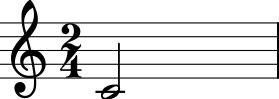

In [11]:
nt = ms.note.Note("C")
nt.duration = ms.duration.Duration("half")
nt.show()

In [12]:
print(nt.duration, nt.duration.type)

<music21.duration.Duration 2.0> half


Now let's create accompainment. To do this we embed our previous stream within a stream, which will also contain another stream corresponding to the left hand playing. 

In [13]:
two_voices_stream = ms.stream.Stream()
two_voices_stream.append(stream)  # stream is the first voice/right hand
second_voice_stream = ms.stream.Stream()  # stream for the second voice/left hand
scale_below = ["C3", "D3", "E3", "F3", "G3", "A3", "B3"]
for note in scale_below + ["C"] + scale_below[::-1]:
    second_voice_stream.append(ms.note.Note(note))
two_voices_stream.append(second_voice_stream)
second_voice_stream.offset = 0.0  # We need to manually set the offset of the second stream to 0
two_voices_stream.show("text")

{0.0} <music21.stream.Stream 0xa200102e8>
    {0.0} <music21.note.Note C>
    {1.0} <music21.note.Note D>
    {2.0} <music21.note.Note E>
    {3.0} <music21.note.Note F>
    {4.0} <music21.note.Note G>
    {5.0} <music21.note.Note A>
    {6.0} <music21.note.Note B>
    {7.0} <music21.note.Note C>
    {8.0} <music21.note.Note B>
    {9.0} <music21.note.Note A>
    {10.0} <music21.note.Note G>
    {11.0} <music21.note.Note F>
    {12.0} <music21.note.Note E>
    {13.0} <music21.note.Note D>
    {14.0} <music21.note.Note C>
{0.0} <music21.stream.Stream 0xa200b39e8>
    {0.0} <music21.note.Note C>
    {1.0} <music21.note.Note D>
    {2.0} <music21.note.Note E>
    {3.0} <music21.note.Note F>
    {4.0} <music21.note.Note G>
    {5.0} <music21.note.Note A>
    {6.0} <music21.note.Note B>
    {7.0} <music21.note.Note C>
    {8.0} <music21.note.Note B>
    {9.0} <music21.note.Note A>
    {10.0} <music21.note.Note G>
    {11.0} <music21.note.Note F>
    {12.0} <music21.note.Note E>
    {13.0} <

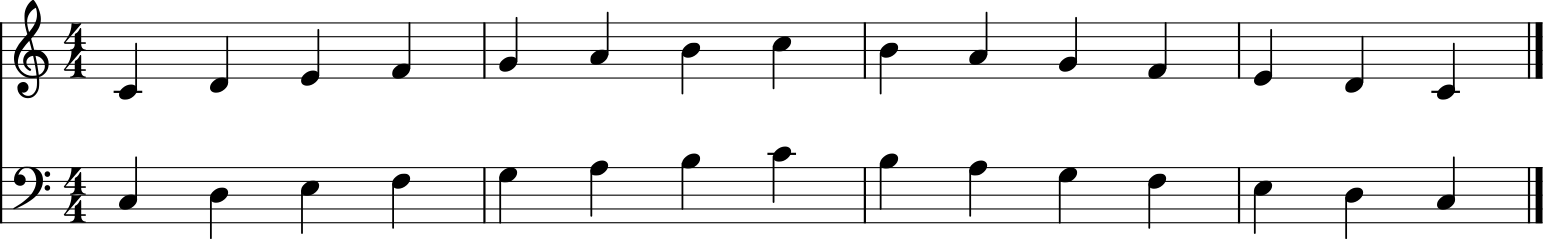

In [14]:
two_voices_stream.show()

Another thing an actual music file will contain will be `Rest` objects:

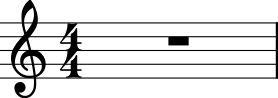

In [15]:
r = ms.note.Rest(type='whole')
r.show()

In [16]:
print(r.duration, r.duration.type)

<music21.duration.Duration 4.0> whole


Rests in music are obviously very important and probably need to be encoded too in our representation to feed it onto the ANN (we will need to figure this out later).

## Loading .mid files, Converting back to .mid and Some Exploring

In [17]:
bach = ms.converter.parse("bach_846.mid")
bach

<music21.stream.Score 0xa2010a128>

First let's try to get back the `.mid` file from the `Score` object.

In [18]:
bach.write("midi", "complete-bach_846.mid")

'complete-bach_846.mid'

It works! (Open the file on your computer and check). Now let's explore the `Score` object.

In [19]:
list(bach)

[<music21.stream.Part 0xa20114470>,
 <music21.stream.Part 0xa204e92e8>,
 <music21.stream.Part 0xa2057c748>,
 <music21.stream.Part 0xa206754e0>,
 <music21.stream.Part 0xa207069b0>,
 <music21.stream.Part 0xa207da080>]

In [20]:
bach[0]

<music21.stream.Part 0xa20114470>

Each part corresponds to a different voice/hand. Let's inspect the right hand (not fully, as this is quite long)

In [21]:
bach[0][:20].show("text")

{0.0} <music21.instrument.Piano Piano>
{0.0} <music21.tempo.MetronomeMark andante Quarter=74.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{0.5} <music21.note.Note G>
{0.75} <music21.note.Note C>
{1.0} <music21.tempo.MetronomeMark Quarter=75.5>
{1.0} <music21.note.Note E>
{1.25} <music21.tempo.MetronomeMark andante Quarter=74.0>
{1.25} <music21.note.Note G>
{1.5} <music21.note.Note C>
{1.75} <music21.note.Note E>
{2.0} <music21.note.Rest rest>
{2.5} <music21.note.Note G>
{2.75} <music21.note.Note C>
{3.0} <music21.note.Note E>
{3.25} <music21.tempo.MetronomeMark Quarter=75.0>
{3.25} <music21.note.Note G>
{3.5} <music21.note.Note C>


We can see that there is info for which instrument should be played (pontetially to be omitted in our encoding), the [tempo](https://en.wikipedia.org/wiki/Tempo), the [key](https://en.wikipedia.org/wiki/Key_(music)), the [time signature](https://en.wikipedia.org/wiki/Time_signature) and then notes and rests, with some changes in the tempo between these. We will need to figure out how which of these data points we keep, and how to encode them. For the left hand, we also have `Chord` objects. To filter them, see below.

Getting only the notes, rests and chords, for the first two voices.

In [22]:
two_hands = ms.stream.Stream()

right_hand = []  # Create an empty list instead of an empty stream
right_hand.append(ms.tempo.MetronomeMark("andante", 74))  # Set the tempo as fixed at the beginning
right = iter(bach[0])
right.filters.append(ms.stream.filters.ClassFilter(["Rest", "Note", "Chord"]))
for note in right:
    right_hand.append(note)
right_hand = ms.stream.Stream(right_hand)  # And convert at the end, otherwise it messes up the order
# This Needs more playing-with
    
left_hand = []
left = iter(bach[1])
left.filters.append(ms.stream.filters.ClassFilter(["Rest", "Note", "Chord"]))
for note in left:
    left_hand.append(note)
left_hand = ms.stream.Stream(left_hand)

two_hands.append(right_hand)
two_hands.append(left_hand)
left_hand.offset = 0.0
two_hands.write("midi", "bach_846-first_two_voices_fixed_tempo.mid")

'bach_846-first_two_voices_fixed_tempo.mid'

`bach_846-first_two_voices_fixed_tempo.mid` should be have the same notes as to `bach_846.mid`, but only for the first two voices and with a fixed *andante 74* tempo. You can check this by opening the file and comparing with the original.

## Encoding

TODO: figure out how to encode and decode. NOTE: Probably many-hot encode and add extra dimensions for tempo, key?, etc. The offset would give us the $t$ on the vector $\bar{p}_t$.

## Data Gathering

TODO: figure out where to get data from, and organize songs on different styles and authors. [This](http://web.mit.edu/music21/doc/usersGuide/usersGuide_08_installingMusicXML.html) is a good start. Also check 4.12.2.

## Actual Approach

TODO: Discuss the actual approach, after reading the source on `README.md`. After this, we can proceed with the encoding. For now, we should focus on gathering the data and reading the book/paper.